# KARBAPENEM DİRENÇLİ ENTEROBACTERIACEAE ENFEKSİYONU RİSK FAKTÖRLERİ VE ENFEKSİYONU OLAN HASTALARDA MORTALİTENİN DEĞERLENDİRİLMESİ

**Makine Öğrenmesi Yöntemleri ile Değerlendirilmesi**


---


Prof. Dr. Gül Ruhsar YILMAZ

Prof. Dr. Muhammet DEMİRBİLEK

Öğr. Gör. Süleyman EZDEMİR

Talha DEMİRBİLEK

Ensar DEMİRBİLEK


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/data_apache_yas.csv')


Eksik Verileri NaN olarak değiştirelim.

In [ ]:
dataset.replace("?",np.nan, inplace=True)
dataset

,apache,yas,vaka
0,8.0,64,1
1,18.0,69,1
2,18.0,66,1
3,17.0,66,1
4,10.0,75,1
...,...,...,...
435,8.0,79,2
436,21.0,74,2
437,6.0,58,2
438,8.0,65,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   apache  284 non-null    float64
 1   yas     440 non-null    int64  
 2   vaka    440 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.4 KB


# Eksik Veri

Eksik verileri doldurma işlemi

In [ ]:
#!pip install autoimpute

In [ ]:
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer
si = SingleImputer() # pass through data once
mi = MultipleImputer() # pass through data multiple times
mice = MiceImputer() # pass through data multiple times and iteratively optimize imputations in each column

In [ ]:
print(dataset.dtypes)

apache    float64
yas         int64
vaka        int64
dtype: object


# autoimpute ile eksik veri doldurma
apache verilerindeki eksik veriler medyan alınarak doldurulacak

In [ ]:
data_imputed=si.fit_transform(dataset)

In [ ]:
print(dataset.dtypes)
dataset['vaka'] = dataset.vaka.astype('category')
dataset['apache'] = dataset.vaka.astype(int)
print(dataset.dtypes)

apache     float64
yas          int64
vaka      category
dtype: object
apache       int64
yas          int64
vaka      category
dtype: object


In [ ]:
X = data_imputed.iloc[:, :-1].values
y = data_imputed.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 14.  69.]
 [ 19.  84.]
 [ 24.  70.]
 [  8.  69.]
 [ 16.  59.]
 [  9.  85.]
 [ 16.  93.]
 [  7.  68.]
 [  9.  77.]
 [ 28.  50.]
 [ 22.  37.]
 [  7.  71.]
 [ 19.  78.]
 [  5.  66.]
 [ 13.  77.]
 [  7.  66.]
 [ 22.  80.]
 [  3.  72.]
 [ 11.  87.]
 [  8.  79.]
 [ 20.  66.]
 [ 12.  64.]
 [  6.  18.]
 [ 24.  72.]
 [  9.  75.]
 [  8.  68.]
 [  2.  21.]
 [ 11.  78.]
 [ 23.  80.]
 [  6.  45.]
 [  6.  74.]
 [  5.  58.]
 [ 20.  66.]
 [ 14.  72.]
 [ 28.  73.]
 [  6.  52.]
 [ 32.  79.]
 [ 18.  69.]
 [  2.  37.]
 [ 10.  78.]
 [ 20.  61.]
 [ 28.  85.]
 [ 13.  85.]
 [ 18.  88.]
 [  5.  72.]
 [ 23.  85.]
 [  7.  50.]
 [  7.  71.]
 [ 29.  73.]
 [ 11.  61.]
 [ 24.  74.]
 [  5.  62.]
 [ 13.  65.]
 [ 22.  79.]
 [ 23.  64.]
 [ 13.  83.]
 [  5.  49.]
 [  3.  56.]
 [ 27.  79.]
 [ 20.  59.]
 [  8.  71.]
 [ 15.  61.]
 [ 28.  92.]
 [  7.  55.]
 [ 10.  59.]
 [ 22.  77.]
 [  5.  43.]
 [  8.  79.]
 [  5.  74.]
 [  9.  73.]
 [ 27.  83.]
 [ 16.  65.]
 [  2.  53.]
 [ 17. 667.]
 [ 25.  75.]
 [ 14.  81.]
 [ 24.  72.]

In [ ]:
print(y_train)

[1 2 2 1 2 1 1 1 1 2 1 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 1 2 1 2 2 2 2 1 1 2 2
 2 1 1 1 1 2 1 2 2 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1 2 1 2
 1 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 1 1 2 2
 1 2 2 1 2 1 1 2 1 2 2 2 1 1 1 2 2 2 1 2 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 2 1
 1 1 2 1 2 1 2 2 1 2 2 2 1 1 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1 2 1
 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 1 1
 1 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 1
 2 2 1 2 2 2 1 1 2 2 2 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2
 2 1 2 1 2 2 1 2 1 1 2 2 1 2 1 1 2 2 1 1 1 2 2 2 1 1 2 1 2 2 1 1 1 1]


In [ ]:
print(X_test)

[[14. 46.]
 [22. 57.]
 [17. 73.]
 [ 7. 72.]
 [16. 74.]
 [ 8. 31.]
 [ 7. 27.]
 [16. 76.]
 [10. 78.]
 [16. 74.]
 [ 9. 48.]
 [26. 85.]
 [13. 63.]
 [13. 80.]
 [ 7. 83.]
 [19. 64.]
 [26. 59.]
 [ 5. 72.]
 [10. 82.]
 [18. 48.]
 [13. 67.]
 [18. 30.]
 [27. 91.]
 [ 2. 39.]
 [ 2. 46.]
 [ 5. 37.]
 [ 6. 33.]
 [ 6. 53.]
 [11. 48.]
 [18. 51.]
 [27. 82.]
 [18. 69.]
 [16. 88.]
 [ 2. 52.]
 [ 5. 56.]
 [21. 78.]
 [ 5. 65.]
 [22. 45.]
 [10. 87.]
 [ 6. 58.]
 [16. 78.]
 [21. 74.]
 [19. 66.]
 [16. 63.]
 [ 5. 67.]
 [58. 83.]
 [21. 73.]
 [ 7. 39.]
 [18. 69.]
 [21. 57.]
 [28. 68.]
 [27. 68.]
 [17. 71.]
 [27. 66.]
 [11. 69.]
 [ 7. 69.]
 [18. 83.]
 [ 2. 70.]
 [17. 89.]
 [22. 80.]
 [ 7. 72.]
 [11. 78.]
 [10. 88.]
 [17. 82.]
 [ 9. 72.]
 [22. 79.]
 [ 3. 47.]
 [13. 77.]
 [11. 39.]
 [26. 73.]
 [27. 71.]
 [22. 81.]
 [ 7. 59.]
 [22. 62.]
 [ 1. 23.]
 [ 7. 57.]
 [27. 62.]
 [11. 44.]
 [23. 69.]
 [28. 18.]
 [ 7. 29.]
 [27. 70.]
 [11. 43.]
 [17. 58.]
 [23. 55.]
 [21. 69.]
 [17. 65.]
 [ 7. 73.]
 [ 6. 77.]
 [ 3. 59.]
 [10. 75.]

In [ ]:
print(y_test)

[1 2 2 2 1 1 1 2 2 2 1 1 2 2 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 1 1 2 2 1 2
 1 1 2 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2 1 1
 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 2 1 2 1 1 2 2 1 2 2 1 1 2 1 1 2]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

# SVM Algoritması

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
print(classifier.predict(sc.transform([[100,0]])))

[1]


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29 27]
 [18 36]]


0.5909090909090909

<ipython-input-134-d7ea1924e473>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


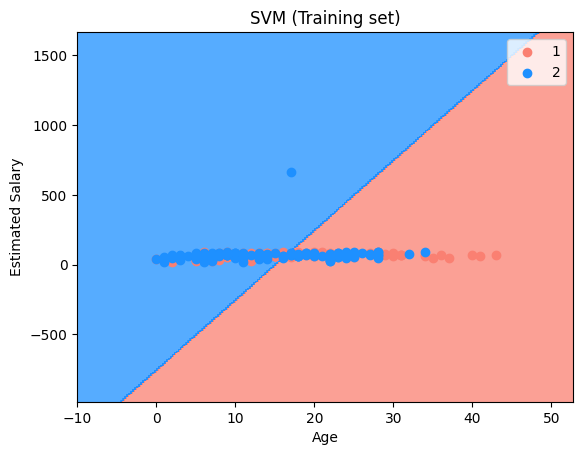

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()